## Fish Project
1. Question

    How would fish population change if a new predator were introduced?
    This matters because it would inform people about the dangers of invasive species, and also fisherman would care a lot about 
    a decline in fish population
    
2. Model

    Number of fish
    Number of fish and fish eggs consumed by predator
    Natural birth and death rate of fish
    Predator birth and death rate?
    Updating number of fish and predators action
    Metrics: Number of fish still alive after predators introduced (as %?)
    
3. Results

    Number of fish and number of predators are expected to be inveresely proportional
    But maybe there is also the added complexity of predators increase so fish decline so predators decline so fish increase
    
4. Interpretation

    By inputting different numbers of predators we could see how many fish make up the population


## Code Starts Here
Question: What would the prey population be t days into the model depending on predator population?
Initial predator population (variable)
Predator growth function (function) 
Natural birth rate prey (variable)
Natural death rate prey (variable)
Prey killed by predator (function of #predators and #prey)





In [6]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# import functions from the modsim.py module
from modsim import *
from pandas import read_html

In [125]:
#ry_state = State(
#                 y_pop=y_initial_pop
#               )

def update(system, state):
    unpack(system)           #this lets us use the variables in system without writing system.whatever each time-still for state



def update_prey(y_pop, system):
    unpack(system)
    y_pop = (y_pop)-(0.0001*y_pop*system.r_pop) #updates the prey pop using Lotka-Volterra equation-the prey # is decreasing here
    y_pop = y_pop*1.001 #the prey population natural growth is .001 which is the birth rate minus the death rate 
    if y_pop<0:        #the population cannot become negative
        y_pop = 0
    return y_pop
        
def update_predator(r_pop, y_pop, system):
    unpack(system)
    r_pop = (0.0001*y_pop*r_pop)-(r_pop) #Lotka-Volterra equation for the growth rate of the predator  the prey # is increasing
    if r_pop<0:
        r_pop = 0
    return r_pop
    
    
#for r_pop in r_initial_pop_array:
    #state = run_simulation(p1, p2, num_steps)
    
    

    
def run_simulation(system):

    results_y = TimeSeries()
    results_r = TimeSeries()
    results_y[system.t_0] = system.y_initial_pop
    results_r[system.t_0] = system.r_pop

    for t in linrange(system.t_0, system.t_end):
        results_y[t+1] = update_prey(results_y[t], system)
        results_r[t+1] = update_predator(results_r[t], results_y[t], system)
        
    return results_y, results_r
    


In [126]:
def plot_results(results_y, label):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(results_y, label=label)
    
    decorate(xlabel='Time(days)', 
             ylabel='Prey Population',
             title='Time Vs Prey Pop')

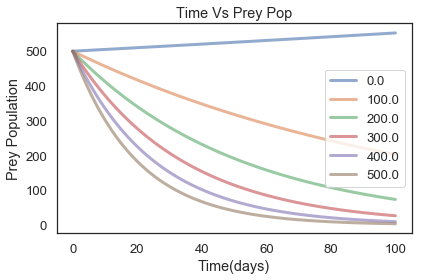

In [127]:
r_initial_pop_array = linrange (0, 500, 100, endpoint=True) 


for r_i_pop in r_initial_pop_array:
    ry_system = System(t_0=0,
                   t_end=100,
                   y_initial_pop=500,
                   hunger=0.25,
                   r_pop=r_i_pop
                    )
    results_y, results_r = run_simulation(ry_system)

    plot_results(results_y, r_i_pop)

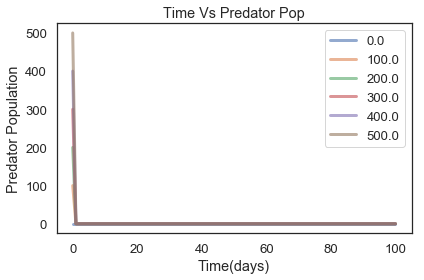

In [128]:
r_initial_pop_array = linrange (0, 500, 100, endpoint=True) 


for r_i_pop in r_initial_pop_array:
    ry_system = System(t_0=0,
                   t_end=100,
                   y_initial_pop=500,
                   hunger=0.25,
                   r_pop=r_i_pop
                    )
    results_y, results_r = run_simulation(ry_system)

    plot_results(results_r, r_i_pop)
    
    decorate(xlabel='Time(days)', 
             ylabel='Predator Population',
             title='Time Vs Predator Pop')
